In [481]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

%matplotlib inline
%config IPCompleter.use_jedi = False
plt.rcParams["figure.figsize"] = (12, 8)
plt.style.use("fivethirtyeight")
font_t = {"fontname":"Arial", "size":18, "weight":"bold"}
font_l = {"name":"Arial", "size":14, "weight":"bold"}

#  Synthetic 2-D Gaussian clusters

In [6]:
! dir

 Volume in drive C has no label.
 Volume Serial Number is F611-6AC3

 Directory of C:\Users\rehma\Documents\Poli\DSL\DSLabs\Lab10

01/03/2021  04:33 PM    <DIR>          .
01/03/2021  04:33 PM    <DIR>          ..
01/03/2021  03:43 PM    <DIR>          .ipynb_checkpoints
01/03/2021  03:58 PM            70,004 2D_gauss_clusters.txt
01/03/2021  03:59 PM           172,922 chameleon_clusters.txt
01/02/2021  11:06 PM           596,930 Data_Science_Lab_10_2020_2021.pdf
01/03/2021  04:33 PM             1,440 Lab10.ipynb
01/03/2021  04:00 PM         5,727,087 T-newsgroups.zip
               5 File(s)      6,568,383 bytes
               3 Dir(s)  20,609,847,296 bytes free


In [7]:
df_gauss = pd.read_csv("2D_gauss_clusters.txt")
df_gauss.head()

x       y
0  845753  636607
1  812954  643720
2  868217  609046
3  920248  607272
4  841621  639394

In [8]:
df_gauss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   x       5000 non-null   int64
 1   y       5000 non-null   int64
dtypes: int64(2)
memory usage: 78.2 KB


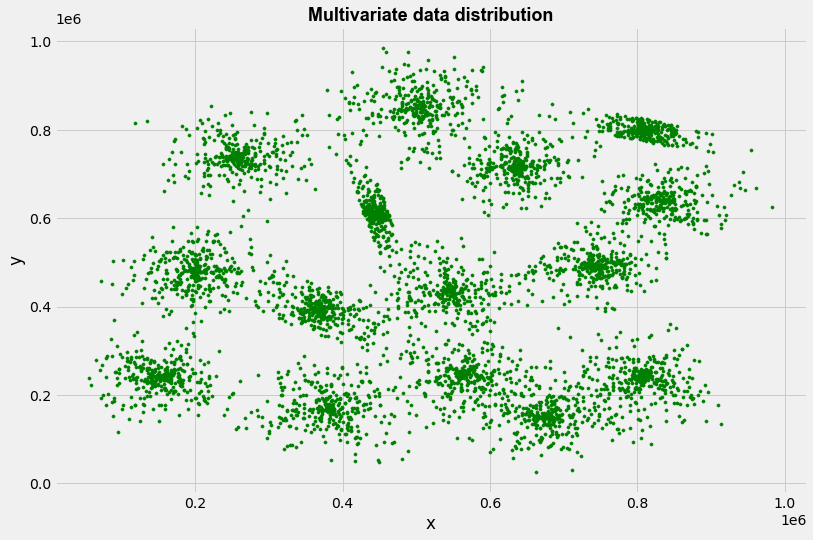

In [78]:
title = "Multivariate data distribution"
l_x = "x"
l_y = 'y'

plt.scatter(df_gauss.x, df_gauss.y,
           c = 'g',
           s = 10
           )


plt.title(title, font_t)
plt.xlabel(l_x)
plt.ylabel(l_y)
plt.show()

In [207]:
kmc = KMeans(n_clusters=15)
y_pred_km = kmc.fit_predict(df_gauss)

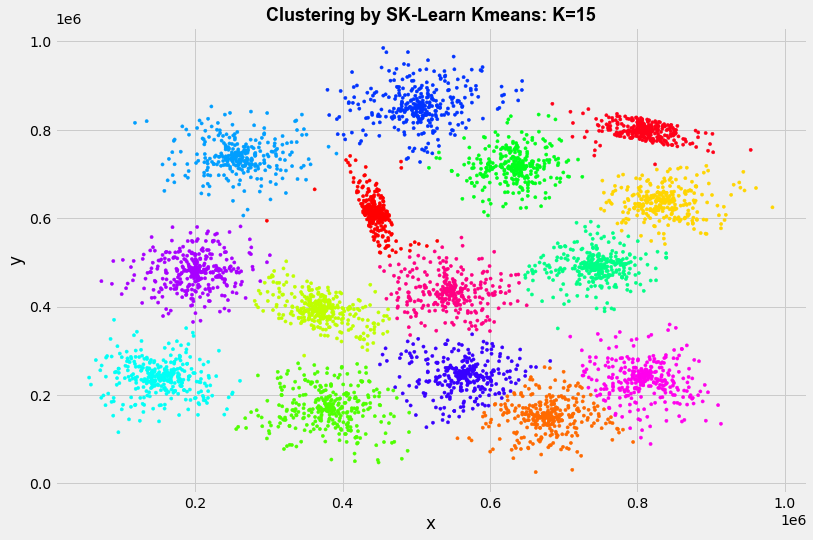

In [209]:
title = "Clustering by SK-Learn Kmeans: K=15"
l_x = "x"
l_y = 'y'

plt.scatter(df_gauss.x, df_gauss.y,
           c = y_pred_km,
           cmap = 'hsv',
           s = 10
           )


plt.title(title, font_t)
plt.xlabel(l_x)
plt.ylabel(l_y)
plt.show()

In [69]:
agc = AgglomerativeClustering(n_clusters= 15, linkage = 'average')
y_pred_agg = agc.fit_predict(df_gauss) 

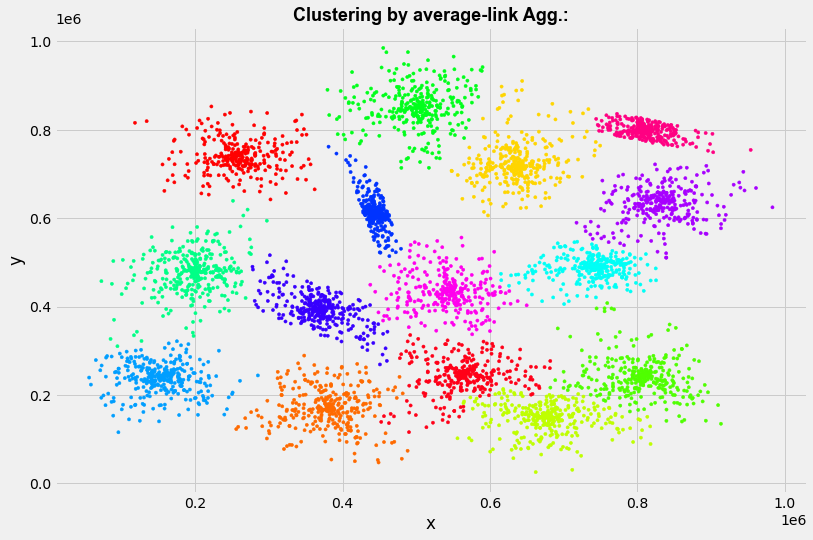

In [80]:
title = "Clustering by average-link Agg.:"
l_x = "x"
l_y = 'y'

plt.scatter(df_gauss.x, df_gauss.y,
           c = y_pred_agg,
           cmap = 'hsv',
           s = 10
           )


plt.title(title, font_t)
plt.xlabel(l_x)
plt.ylabel(l_y)
plt.show()

In [210]:
s_kmeans = silhouette_score(df_gauss, y_pred_km)
x_agg_avg = silhouette_score(df_gauss, y_pred_agg)

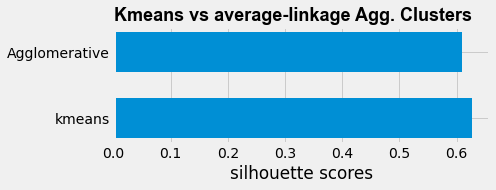

In [211]:
title = "Kmeans vs average-linkage Agg. Clusters"
l_x = "silhouette scores"

plt.figure(figsize = (6,2))
plt.barh(["kmeans","Agglomerative"], [s_kmeans,x_agg_avg], height=0.6)

plt.title(title, font_t, loc = 'left')
plt.xlabel(l_x)
plt.show()

## Kmeans Implementation

In [441]:
class My_KMeans:
    import numpy as np
    def __init__(self, n_clusters, max_iter=50, plot_clusters=False, plot_step=5, initial_factor = 2):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.centroids = None
        self.initial_factor = initial_factor
        self.labels = None
        self.prev_labels = None
        self.plot_clusters = plot_clusters
        self.plot_step = plot_step
        
    def fit_predict(self, X):
        """Run the K-means clustering on X.
        :param X: input data points, Dataframe, shape = (N,C).
        :return: labels : array, shape = N.
        """
        self.centroids = X.sample(self.n_clusters*self.initial_factor, random_state = 17).values
        #self.centroids = candidates[:self.n_clusters,:]
#         self.plot(X,-1)
        self.centroids = self.most_apart_points(self.centroids)
#         self.plot(X,-1)
        
        for i in range(self.max_iter):
            self.labels = X.apply(self.min_euc_distance, axis = 1)
            new_centroids = np.array([[],[]]).reshape(-1,2)
            
            for label in range(self.n_clusters):
                mask = self.labels == label
                new_cent = X[mask].mean(axis = 0).values
                new_centroids = np.vstack((new_centroids, new_cent))
            
            self.centroids = new_centroids
            if self.plot_clusters and not i%self.plot_step : 
                self.plot(X, i)
                
        return self.labels

    
    def plot(self, X, i):
        title_1 = f"My Kmeans: K={self.n_clusters}, iter={i}"
        l_x = "x"
        l_y = 'y'

        plt.scatter(X.x, X.y,
                   c = self.labels, cmap = 'hsv',s = 10)

        plt.title(title_1, font_t)
        plt.ylabel(l_y)

        plt.scatter(self.centroids[:,0], self.centroids[:,1],
                    marker = '*', c = 'k', s = 50 )

        plt.show()
            
    def euc_distance(self, a, lst):
        diff = lst - a
        sq = diff **2
        add = sq.sum(axis = 1)
        dist = np.sqrt(add)
        return dist
    
    def min_euc_distance(self, a):
        #print(type(self.centroids))
        a = a.values
        lst = self.centroids
        diff = lst - a
        sq = diff **2
        add = sq.sum(axis = 1)
#         dist = np.sqrt(add)
        dist = self.euc_distance(a, self.centroids)
        return np.argmin(dist)

    def most_apart_points(self, points):
        dists = []
        p_mask = np.ones(points.shape[0], bool)
        while p_mask.sum() != self.n_clusters:
            dists = []
            
            for i in range(points.shape[0]):
                mask = np.ones(points.shape[0], dtype=bool)
                mask[i] = False
                dist = self.euc_distance(points[i],points[mask])
                dists.append(min(dist))
                
#             print(len(dists))
            closest_point = np.argmin(dists)
            p_mask[closest_point] = False
            points = points[p_mask]
            p_mask = p_mask[p_mask]
        
        return points[p_mask]

In [440]:
mkmc = My_KMeans(n_clusters=15, initial_factor=5)
y_pred = mkmc.fit_predict(df_gauss)

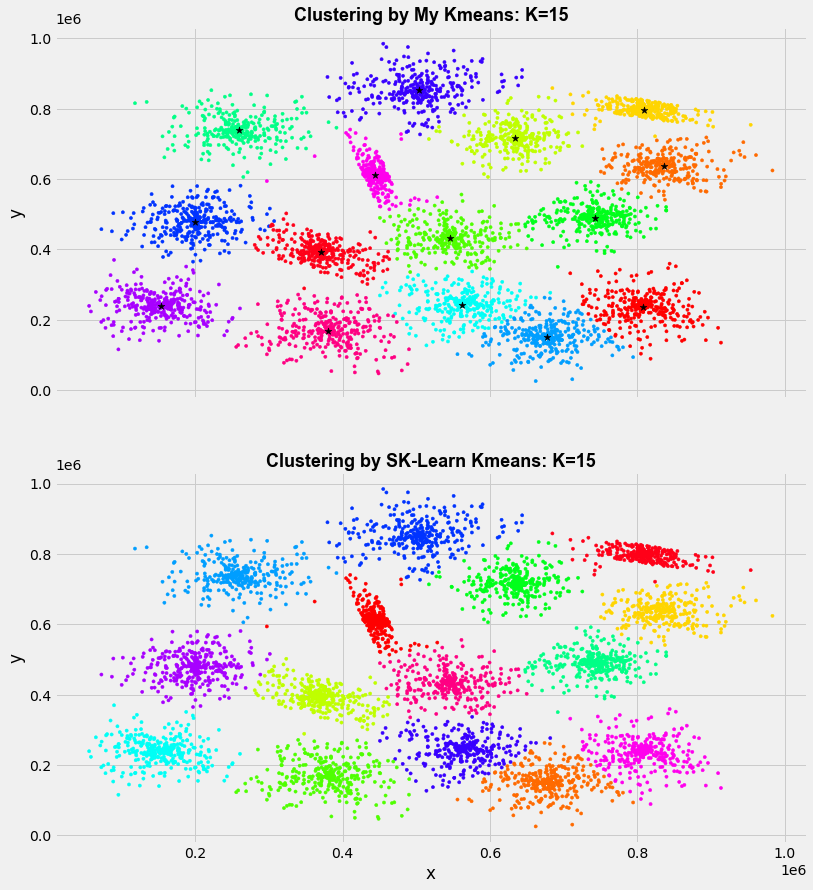

In [325]:
title_1 = "Clustering by My Kmeans: K=15"
title_2 = "Clustering by SK-Learn Kmeans: K=15"
l_x = "x"
l_y = 'y'

fig, (ax_1,ax_2) = plt.subplots(2,1,figsize = (12,14), sharex=True)

ax_1.scatter(df_gauss.x, df_gauss.y,
           c = y_pred, cmap = 'hsv',s = 10)

ax_1.set_title(title_1, font_t)
ax_1.set_ylabel(l_y)

ax_1.scatter(mkmc.centroids[:,0], mkmc.centroids[:,1],
            marker = '*', c = 'k', s = 50 )

ax_2.scatter(df_gauss.x, df_gauss.y,
           c = y_pred_km, cmap = 'hsv',s = 10)

ax_2.set_title(title_2, font_t)
ax_2.set_ylabel(l_y)
ax_2.set_xlabel(l_x)

plt.show()

In [326]:
s_my_kmeans = silhouette_score(df_gauss, y_pred)

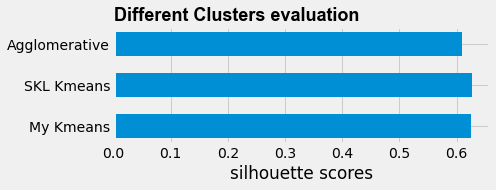

In [327]:
title = "Different Clusters evaluation"
l_x = "silhouette scores"

plt.figure(figsize = (6,2))
plt.barh(["My Kmeans", "SKL Kmeans","Agglomerative"], [s_my_kmeans,s_kmeans,x_agg_avg], height=0.6)

plt.title(title, font_t, loc = 'left')
plt.xlabel(l_x)
plt.show()

In [226]:
! dir

 Volume in drive C has no label.
 Volume Serial Number is F611-6AC3

 Directory of C:\Users\rehma\Documents\Poli\DSL\DSLabs\Lab10

01/03/2021  07:01 PM    <DIR>          .
01/03/2021  07:01 PM    <DIR>          ..
01/03/2021  03:43 PM    <DIR>          .ipynb_checkpoints
01/03/2021  03:58 PM            70,004 2D_gauss_clusters.txt
01/03/2021  03:59 PM           172,922 chameleon_clusters.txt
01/02/2021  11:06 PM           596,930 Data_Science_Lab_10_2020_2021.pdf
01/03/2021  07:01 PM         1,106,499 Lab10.ipynb
01/03/2021  04:00 PM         5,727,087 T-newsgroups.zip
               5 File(s)      7,673,442 bytes
               3 Dir(s)  20,603,371,520 bytes free


## chameleon data set

In [229]:
df_cham = pd.read_csv("chameleon_clusters.txt")
df_cham.head()

x           y
0   68.601997  102.491997
1  454.665985  264.808990
2  101.283997  169.285995
3  372.614990  263.140991
4  300.989014   46.555000

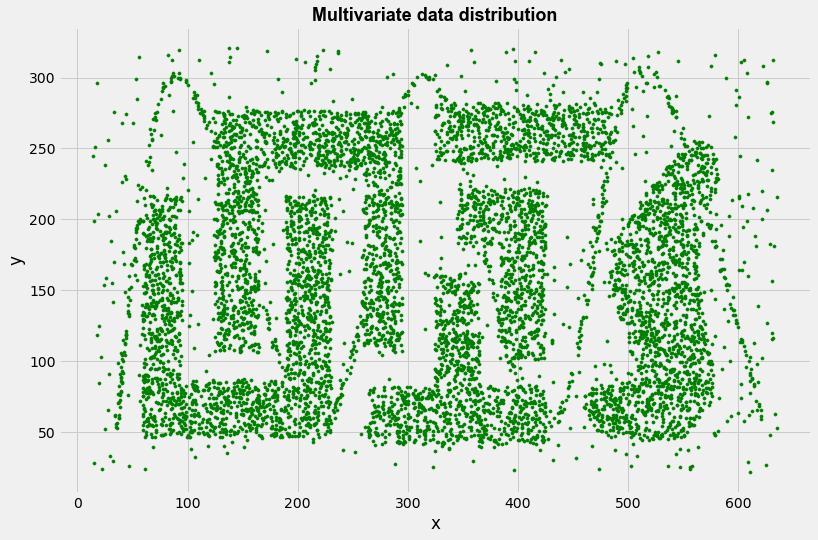

In [235]:
title = "Multivariate data distribution"
l_x = "x"
l_y = 'y'

plt.scatter(df_cham.x, df_cham.y,
           c = 'g',cmap = 'hsv',
           s = 10
           )


plt.title(title, font_t)
plt.xlabel(l_x)
plt.ylabel(l_y)
plt.show()

### Using Kmeans over Non-globular Datasets

In [231]:
y_preds = {}
silhs = {}
for k in range(5,16,1):
    cls = My_KMeans(n_clusters=k)
    y_pred = cls.fit_predict(df_cham)
    y_preds[k] = y_pred
    silhs[k] = silhouette_score(df_cham, y_pred)

In [241]:
len(y_preds)

11

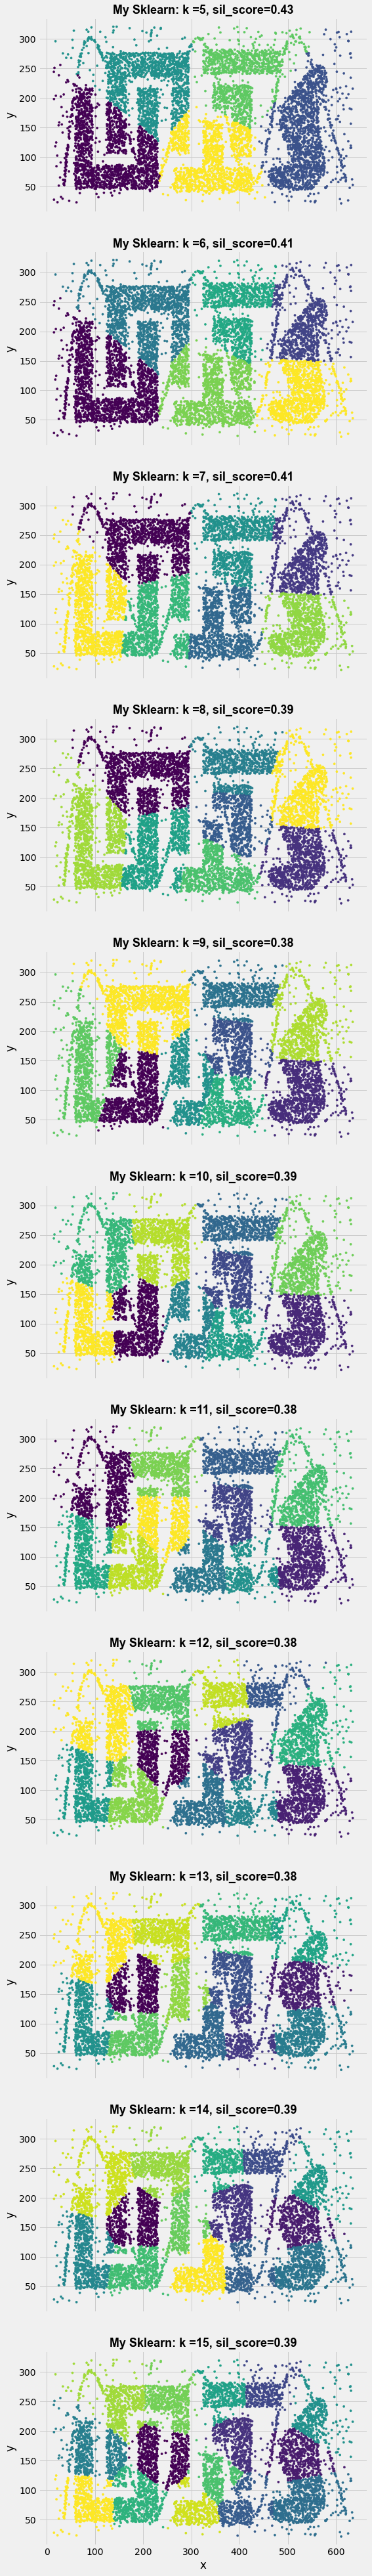

In [245]:
l_x = "x"
l_y = 'y'

fig, axs = plt.subplots(len(silhs),1,figsize = (8,6*11), sharex=True)
for i in range(5,16):
    title = f"My Sklearn: k ={i}, sil_score={silhs[i]:.2f}"
    
    axs[i-5].scatter(df_cham.x, df_cham.y,
               c = y_preds[i],cmap = 'hsv',
               s = 10
               )

    axs[i-5].set_title(title, font_t)
    axs[i-5].set_ylabel(l_y)

axs[-1].set_xlabel(l_x)
plt.show()

In [442]:
cls = My_KMeans(n_clusters=12, plot_clusters=False)
y_pred = cls.fit_predict(df_cham)

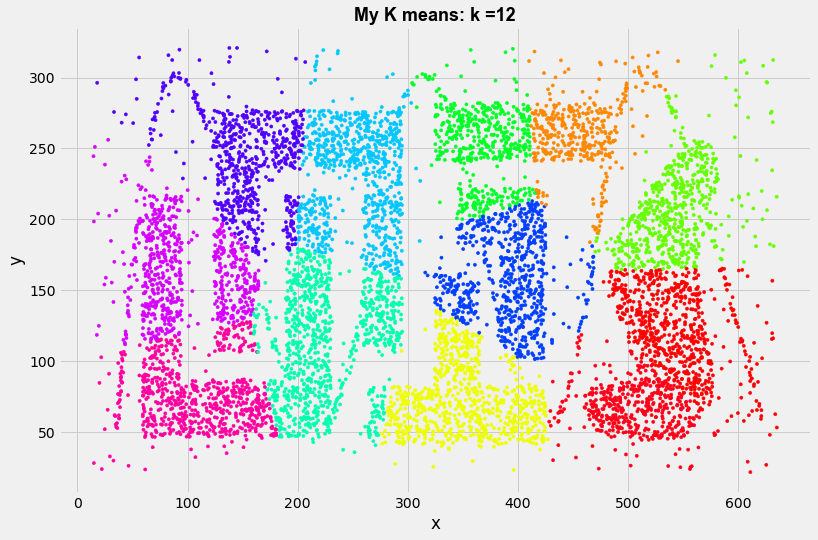

In [445]:
l_x = "x"
l_y = 'y'

fig, axs = plt.subplots(1,1)
title = f"My K means: k =12"

axs.scatter(df_cham.x, df_cham.y,
           c = y_pred,
           cmap = 'hsv',
           s = 10
           )

axs.set_title(title, font_t)
axs.set_ylabel(l_y)
axs.set_xlabel(l_x)
plt.show()

In [444]:
kmc = KMeans(n_clusters=12, random_state=17)
y_pred_kmc = kmc.fit_predict(df_cham)

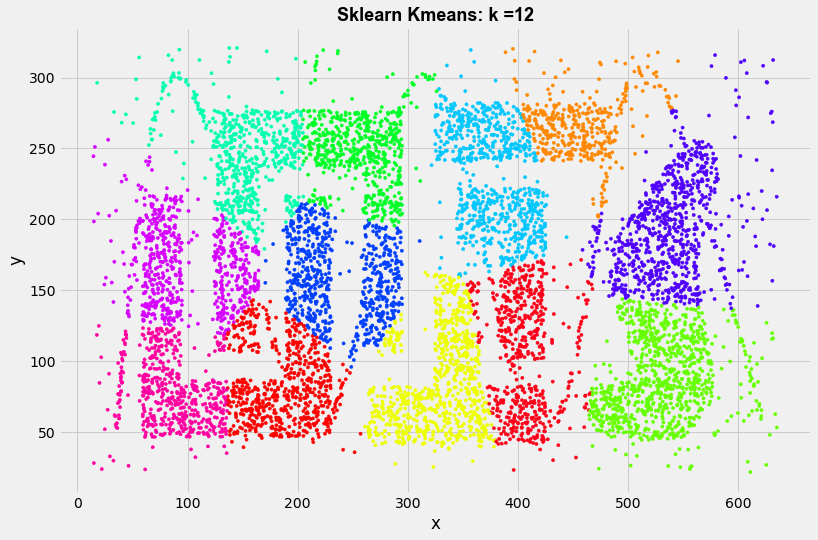

In [447]:
l_x = "x"
l_y = 'y'

fig, axs = plt.subplots(1,1)
title = f"Sklearn Kmeans: k =12"

axs.scatter(df_cham.x, df_cham.y,
           c = y_pred_kmc,
           cmap = 'hsv',
           s = 10
           )

axs.set_title(title, font_t)
axs.set_ylabel(l_y)
axs.set_xlabel(l_x)
plt.show()

In [455]:
def plot_clusters(df, y_pred, title):
    l_x = "x"
    l_y = 'y'

    fig, axs = plt.subplots(1,1)
    axs.scatter(df.x, df.y,
               c = y_pred,
               cmap = 'hsv',
               s = 10
               )

    axs.set_title(title, font_t)
    axs.set_ylabel(l_y)
    axs.set_xlabel(l_x)
    plt.show()

In [479]:
agg_c = AgglomerativeClustering(n_clusters=6, linkage= 'average')
y_pred_agg = agg_c.fit_predict(df_cham)

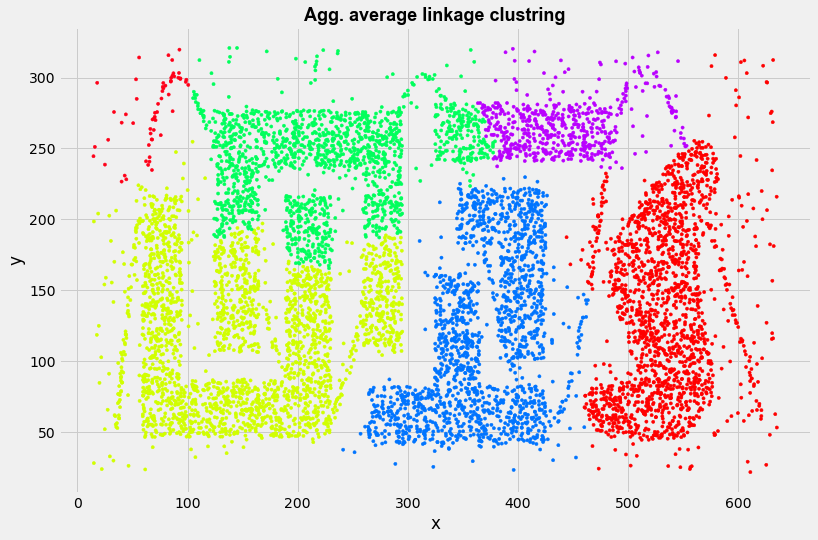

In [485]:
plot_clusters(df_cham, y_pred_agg, "Agg. average linkage clustring")

In [482]:
from sklearn.neighbors import NearestNeighbors

# Given matrix X and min_npoints, plot K-Neighbors chart
# It also plots a horizontal line in correspondence to eps value
def plot_neighbors(X, min_points, quantile = 0.75):
    # +1 because NearestNeighbors as provide distance with point itself
    nbrs = NearestNeighbors(n_neighbors= min_points + 1).fit(X)
    distances, indices = nbrs.kneighbors(X)

    k_dist = np.sort(distances[:,-1]) 
    x_axis = np.arange(X.shape[0])
    eps = np.quantile(k_dist, quantile)
    print(f"eps:{eps:.4f}")

    fig, ax = plt.subplots()
    ax.plot(x_axis, k_dist, linestyle='', marker='o', markersize=1)
    
    # Plot a horizontal line in correspondence to eps value
    ax.hlines(eps, x_axis.min(), x_axis.max(), linestyle='--')
    ax.set_title(f"K-Neighbors chart. Min_points = {min_points}, eps={eps}.")
    plt.grid()
    plt.show()

eps:9.8325


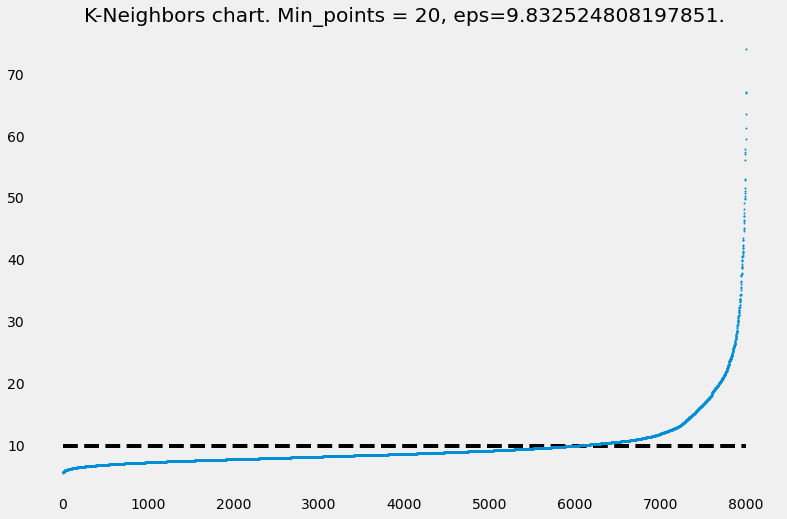

In [488]:
plot_neighbors(df_cham, 20)

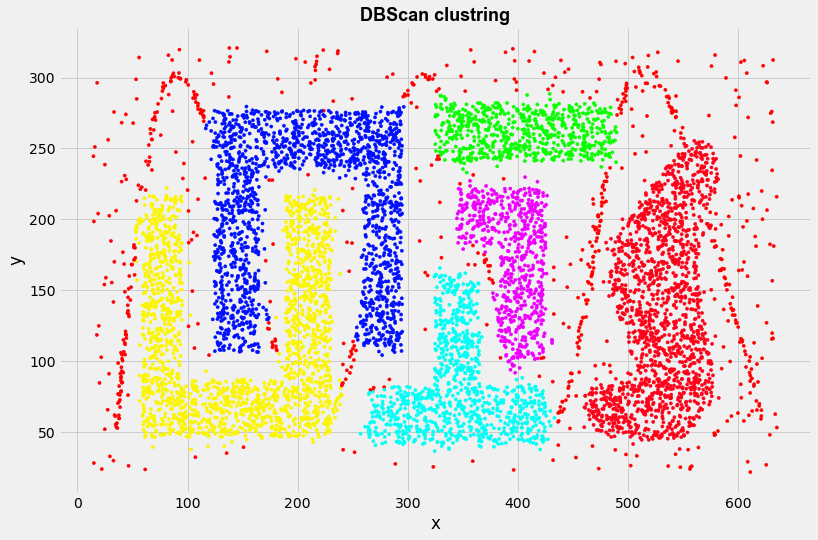

In [489]:
dbc = DBSCAN(eps = 9.8, min_samples=20)
y_pred_db = dbc.fit_predict(df_cham)

plot_clusters(df_cham, y_pred_db, "DBScan clustring")

In [490]:
sil_sk = silhouette_score(df_cham, y_pred_kmc)
sil_my = silhouette_score(df_cham, y_pred)
sil_agg = silhouette_score(df_cham, y_pred_db)
sil_db = silhouette_score(df_cham, y_pred_agg)


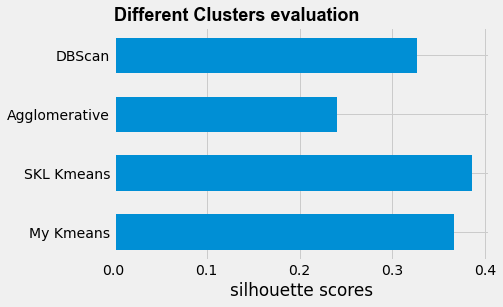

In [491]:
title = "Different Clusters evaluation"
l_x = "silhouette scores"

plt.figure(figsize = (6,4))
plt.barh(["My Kmeans", "SKL Kmeans","Agglomerative", "DBScan"], [sil_my,sil_sk,sil_agg,sil_db], height=0.6)

plt.title(title, font_t, loc = 'left')
plt.xlabel(l_x)
plt.show()